In [4]:
import pandas as pd
import jellyfish
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import seaborn as sns
%matplotlib inline 

In [25]:
maindata=pd.read_excel(r"C:\Users\Anastasia\Documents\Python\Хакатон\ecologydata.xlsx")
maindata['region'] = maindata['region'].map(lambda x: x.strip())
maindata['region'] = maindata['region'].map(lambda x: x.capitalize())
maindata=maindata.drop('Unnamed: 0',axis=1)
maindata = maindata[maindata['region'] != 'Валовой региональный продукт по субъектам российской федерации (валовая добавленная стоимость в текущих основных ценах) – всего']


changes = {'Г. севастополь': 'Г севастополь',
           'Республика северная осетия-алания': 'Республика северная осетия – алания',
           'Республика саха(якутия)': 'Республика саха (якутия)'}

maindata['region'] = maindata['region'].replace(changes)


okrugi_list = ['Северо-кавказский федеральный округ',
       'Северо-западный федеральный округ', 'Центральный федеральный округ',
       'Приволжский федеральный округ', 'Южный федеральный округ',
       'Сибирский федеральный округ', 'Уральский федеральный округ',
       'Дальневосточный федеральный округ']
maindata = maindata[~maindata['region'].isin(okrugi_list)]
maindata = maindata.groupby(['region', 'year']).max().reset_index()
maindata['region'].unique()
pd.DataFrame(maindata['region'].unique())
pd.DataFrame(maindata['region'].unique()).to_excel(r"C:\Users\Anastasia\Documents\Python\Хакатон\regions.xlsx")



In [12]:
maindata.to_excel(r"C:\Users\Anastasia\Documents\Python\Хакатон\maindata.xlsx")

In [5]:
with pd.option_context('display.max_rows', 999):
    display(maindata['region'].value_counts().sort_index())

Алтайский край                         10
Амурская область                       10
Архангельская область                  10
Астраханская область                   10
Белгородская область                   10
Брянская область                       10
Владимирская область                   10
Волгоградская область                  10
Вологодская область                    10
Воронежская область                    10
Г севастополь                          10
Г. москва                              10
Г. санкт-петербург                     10
Еврейская автономная область           10
Забайкальский край                     10
Ивановская область                     10
Иркутская область                      10
Кабардино-балкарская республика        10
Калининградская область                10
Калужская область                      10
Камчатский край                        10
Карачаево-черкесская республика        10
Кемеровская область                    10
Кировская область                 

In [6]:
for reg1 in maindata['region'].unique():
    for reg2 in maindata['region'].unique():
        if reg1 > reg2:
            if jellyfish.levenshtein_distance(reg1, reg2) < 4:
                print(reg1, reg2)

Вологодская область Волгоградская область
Кировская область Кемеровская область
Красноярский край Краснодарский край
Курская область Амурская область
Курская область Калужская область
Курская область Кировская область
Курская область Курганская область
Мурманская область Курганская область
Новгородская область Белгородская область
Новгородская область Нижегородская область
Омская область Амурская область
Омская область Курская область
Орловская область Кировская область
Псковская область Кировская область
Псковская область Московская область
Псковская область Орловская область
Республика крым Республика коми
Ростовская область Костромская область
Ростовская область Московская область
Ростовская область Псковская область
Самарская область Амурская область
Тверская область Амурская область
Тверская область Курская область
Томская область Курская область
Томская область Омская область
Томская область Тверская область
Тульская область Курская область
Тульская область Тверская область
Тульс

In [7]:
changes = {'Г. севастополь': 'Г севастополь',
           'Республика северная осетия-алания': 'Республика северная осетия – алания',
           'Республика саха(якутия)': 'Республика саха (якутия)'}

In [8]:
maindata['region'] = maindata['region'].replace(changes)

In [9]:
with pd.option_context('display.max_rows', 999):
    display(maindata['region'].value_counts().sort_index())

Алтайский край                         10
Амурская область                       10
Архангельская область                  10
Астраханская область                   10
Белгородская область                   10
Брянская область                       10
Владимирская область                   10
Волгоградская область                  10
Вологодская область                    10
Воронежская область                    10
Г севастополь                          10
Г. москва                              10
Г. санкт-петербург                     10
Еврейская автономная область           10
Забайкальский край                     10
Ивановская область                     10
Иркутская область                      10
Кабардино-балкарская республика        10
Калининградская область                10
Калужская область                      10
Камчатский край                        10
Карачаево-черкесская республика        10
Кемеровская область                    10
Кировская область                 

In [10]:
okrugi_list = ['Северо-кавказский федеральный округ',
       'Северо-западный федеральный округ', 'Центральный федеральный округ',
       'Приволжский федеральный округ', 'Южный федеральный округ',
       'Сибирский федеральный округ', 'Уральский федеральный округ',
       'Дальневосточный федеральный округ']

In [11]:
okrugi_df = maindata[maindata['region'].isin(okrugi_list)]

In [12]:
maindata.notnull().mean()

region                1.000000
year                  1.000000
population            0.887805
pollution_static      0.887805
revealed_pollution    0.879268
spending              0.500000
GRP_pc                0.787805
dtype: float64

In [22]:
#возьмем 2016 так как там более менее заполнены все колонки
sample_2016=maindata[maindata['year']==2016]
sample_2016=sample_2016.dropna(how='any',axis=0)
sample_2016.isnull().sum() # то есть null нет хули тебе не нравится\
y= sample_2016['pollution_static']
x=sample_2016.drop('pollution_static',axis=1).drop('region',axis=1)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
[round(x, 2) for x in lr.coef_] # и как это интерпритировать ну блэт лан сойдет

[0.0, -0.1, 1.43, 0.05, -0.0]

In [28]:
lr.predict(x)   

array([  20.98041544,  120.72595219,  234.85471003,  125.73573931,
        318.25732701,   99.44114543,   16.21791066,  216.80712686,
        199.96923812,   61.93163773,   69.46124101,  588.31688383,
        398.50761887,  135.66347155,  174.37852558,   16.55050457,
        582.13900188,    7.3026    ,   62.34765331,  125.30092106,
         26.30043117,  166.91469237,  315.99765259,  187.03435763,
         47.98476704,  101.77379713, 1720.39357703,   97.8480982 ,
         84.25289889,  928.87686356,  323.52822573,   -6.8463227 ,
        -97.45622796,  332.66876454,  155.12558085,  124.62643857,
         23.85872291,  166.01079103,  211.12416443,    7.16623105,
         12.78772533,  396.32848417,  162.05728387,   70.62519099,
         44.98421384,   74.78378837,  766.87770276,  219.42442377,
       -229.80352843,   46.10034983,  165.1492452 ,  505.23566768,
         74.20685354,   30.41822373,  184.95917743,  527.54549863,
        140.31651476,  585.87037314,  100.26400197,  162.74067

In [40]:
sample_2016['pollution_static']=np.log(sample_2016['pollution_static'])



Text(0, 0.5, 'Frequency')

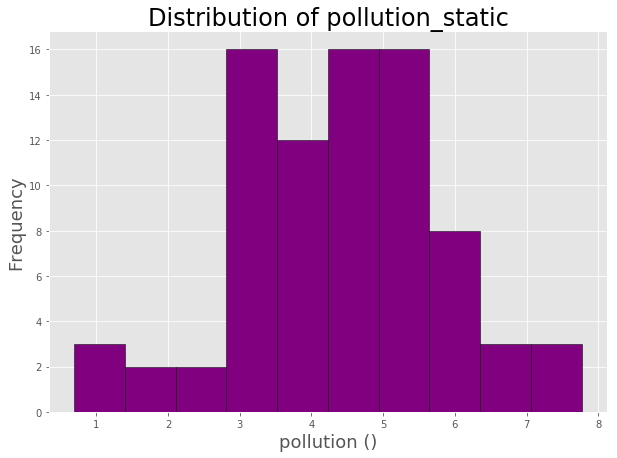

In [41]:
#посмотрим дистрибуции
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Histogram of the pollution of 2016
sample_2016['pollution_static'].plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of pollution_static', size=24)
plt.xlabel('pollution ()', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

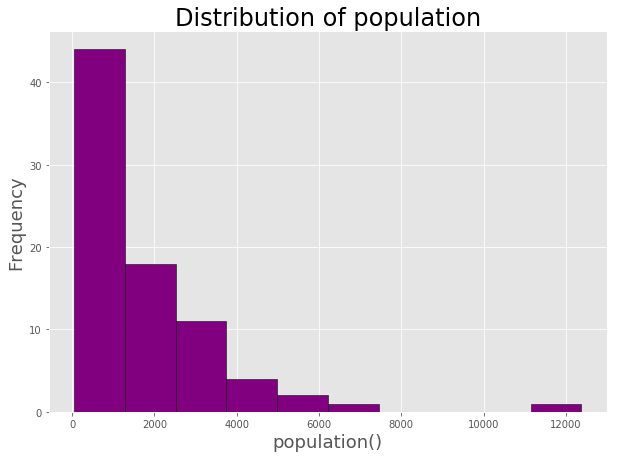

In [36]:
sample_2016['population'].plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of population', size=24)
plt.xlabel('population()', size=18)
plt.ylabel('Frequency', size=18)
#вообще напоминает какое-то распределение ( хотя все по 2016 году хз)

Text(0, 0.5, 'Frequency')

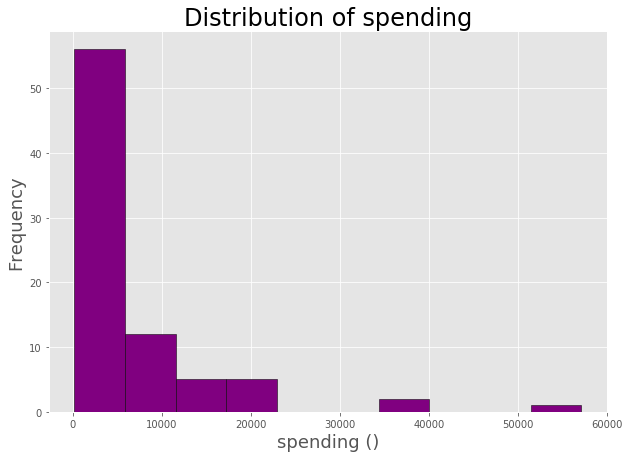

In [37]:
sample_2016['spending'].plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of spending', size=24)
plt.xlabel('spending ()', size=18)
plt.ylabel('Frequency', size=18)
# поч у них фактически одинаковый curve

Text(0, 0.5, 'Frequency')

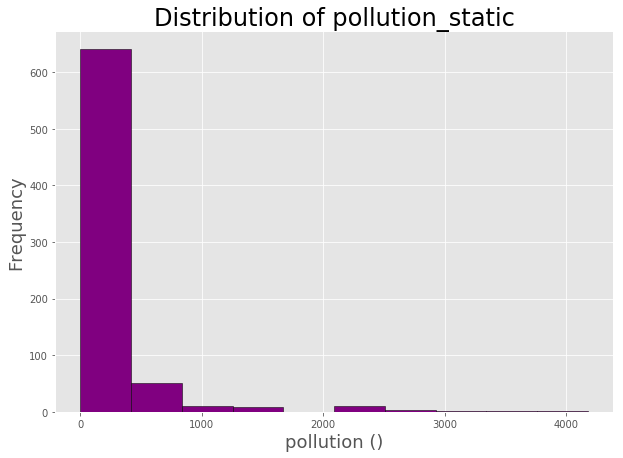

In [38]:
# по всему ряду
maindata['pollution_static'].plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of pollution_static', size=24)
plt.xlabel('pollution ()', size=18)
plt.ylabel('Frequency', size=18)

### Предсказание pollution_static 
Там, где известен spending

### ВРеменной ряд

In [4]:
maindata.head()

,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
0,Алтайский край,2005,2503.0,233.0,77.2,NaN,53812.4
1,Алтайский край,2010,2417.0,207.0,78.9,NaN,124955.8
2,Алтайский край,2011,2407.0,204.0,77.8,NaN,137677.2
3,Алтайский край,2012,2399.0,216.0,79.2,NaN,153556.7
4,Алтайский край,2013,2391.0,201.0,73.5,NaN,173763.5


In [5]:
maindata.groupby('year')['pollution_static'].mean()

year
2005    255.350000
2010    238.975000
2011    239.513750
2012    245.390000
2013    230.582500
2014    212.834146
2015    210.919512
2016    211.658537
2017    213.158537
2018           NaN
Name: pollution_static, dtype: float64

In [40]:
maindata = maindata.groupby(['region', 'year']).max().reset_index()

,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
0,Алтайский край,2005,2503.0,233.0,77.2,NaN,53812.4
1,Алтайский край,2010,2417.0,207.0,78.9,NaN,124955.8
2,Алтайский край,2011,2407.0,204.0,77.8,NaN,137677.2
3,Алтайский край,2012,2399.0,216.0,79.2,NaN,153556.7
4,Алтайский край,2013,2391.0,201.0,73.5,NaN,173763.5
5,Алтайский край,2014,2385.0,203.0,73.0,1850.18,186798.6
6,Алтайский край,2015,2377.0,204.0,72.9,1910.63,204933.1
7,Алтайский край,2016,2366.0,213.0,73.0,2297.58,210350.7
8,Алтайский край,2017,2350.0,204.0,75.0,2163.39,NaN
9,Алтайский край,2018,NaN,NaN,NaN,2662.29,NaN


In [6]:
for ind, gr in maindata.groupby('year'):
    display(gr)
    print('Новая группа')

,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
0,Алтайский край,2005,2503.0,233.0,77.2,NaN,53812.4
10,Амурская область,2005,861.0,104.0,68.9,NaN,88597.1
20,Архангельская область,2005,1282.0,314.0,75.0,NaN,128965.3
30,Астраханская область,2005,1003.0,131.0,14.3,NaN,69814.0
40,Белгородская область,2005,1512.0,102.0,89.9,NaN,95911.2
50,Брянская область,2005,1327.0,49.0,93.8,NaN,49923.4
60,Владимирская область,2005,1486.0,29.0,24.7,NaN,58261.0
70,Волгоградская область,2005,2640.0,221.0,63.1,NaN,76740.6
80,Вологодская область,2005,1235.0,478.0,77.4,NaN,156379.7
90,Воронежская область,2005,2361.0,52.0,44.8,NaN,56534.5


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
1,Алтайский край,2010,2417.0,207.0,78.9,NaN,124955.8
11,Амурская область,2010,829.0,119.0,70.6,NaN,214827.2
21,Архангельская область,2010,1225.0,545.0,55.8,NaN,302801.3
31,Астраханская область,2010,1010.0,125.0,10.7,NaN,143388.8
41,Белгородская область,2010,1532.0,132.0,85.2,NaN,260015.6
51,Брянская область,2010,1275.0,35.0,94.1,NaN,114777.6
61,Владимирская область,2010,1441.0,35.0,28.3,NaN,155494.2
71,Волгоградская область,2010,2607.0,201.0,53.5,NaN,166028.8
81,Вологодская область,2010,1201.0,474.0,78.9,NaN,217826.8
91,Воронежская область,2010,2335.0,77.0,39.6,NaN,148432.6


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
2,Алтайский край,2011,2407.0,204.0,77.8,NaN,137677.2
12,Амурская область,2011,821.0,134.0,70.6,NaN,273175.8
22,Архангельская область,2011,1213.0,373.0,63.8,NaN,360165.9
32,Астраханская область,2011,1015.0,132.0,8.8,NaN,170504.7
42,Белгородская область,2011,1536.0,134.0,85.4,NaN,331010.0
52,Брянская область,2011,1264.0,37.0,92.8,NaN,137187.1
62,Владимирская область,2011,1432.0,35.0,28.8,NaN,181842.6
72,Волгоградская область,2011,2595.0,178.0,53.0,NaN,195463.7
82,Вологодская область,2011,1198.0,469.0,77.4,NaN,269252.8
92,Воронежская область,2011,2332.0,72.0,41.6,NaN,203575.5


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
3,Алтайский край,2012,2399.0,216.0,79.2,NaN,153556.7
13,Амурская область,2012,817.0,127.0,71.7,NaN,280023.9
23,Архангельская область,2012,1202.0,271.0,70.5,NaN,391146.2
33,Астраханская область,2012,1014.0,134.0,8.7,NaN,206677.1
43,Белгородская область,2012,1541.0,134.0,86.4,NaN,354570.6
53,Брянская область,2012,1254.0,39.0,93.0,NaN,164726.6
63,Владимирская область,2012,1422.0,32.0,29.3,NaN,200456.4
73,Волгоградская область,2012,2583.0,171.0,55.2,NaN,220755.1
83,Вологодская область,2012,1196.0,473.0,76.7,NaN,296726.1
93,Воронежская область,2012,2330.0,79.0,38.2,NaN,241947.4


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
4,Алтайский край,2013,2391.0,201.0,73.5,NaN,173763.5
14,Амурская область,2013,811.0,125.0,71.9,NaN,258817.0
24,Архангельская область,2013,1192.0,245.0,69.9,NaN,417776.4
34,Астраханская область,2013,1017.0,130.0,7.7,NaN,269821.7
44,Белгородская область,2013,1544.0,118.0,87.8,NaN,368874.8
54,Брянская область,2013,1242.0,37.0,94.1,NaN,175865.0
64,Владимирская область,2013,1413.0,32.0,29.5,NaN,216320.8
74,Волгоградская область,2013,2569.0,173.0,56.9,NaN,235814.1
84,Вологодская область,2013,1193.0,499.0,71.4,NaN,289782.8
94,Воронежская область,2013,2329.0,76.0,41.3,NaN,262578.3


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
5,Алтайский край,2014,2385.0,203.0,73.0,1850.18,186798.6
15,Амурская область,2014,810.0,132.0,71.4,1836.25,286282.6
25,Архангельская область,2014,1183.0,262.0,63.3,6153.94,456985.8
35,Астраханская область,2014,1021.0,118.0,5.1,4022.92,290822.2
45,Белгородская область,2014,1548.0,127.0,84.6,7044.08,400820.8
55,Брянская область,2014,1233.0,36.0,93.0,1020.36,196096.7
65,Владимирская область,2014,1406.0,31.0,31.9,2125.58,232757.6
75,Волгоградская область,2014,2557.0,154.0,51.5,10183.10,279101.4
85,Вологодская область,2014,1191.0,491.0,69.4,5910.48,324790.3
95,Воронежская область,2014,2331.0,68.0,55.4,4399.08,308004.7


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
6,Алтайский край,2015,2377.0,204.0,72.9,1910.63,204933.1
16,Амурская область,2015,806.0,127.0,73.3,2094.27,343385.7
26,Архангельская область,2015,1174.0,260.0,63.0,6474.20,532533.7
36,Астраханская область,2015,1019.0,119.0,4.7,4458.92,315996.9
46,Белгородская область,2015,1550.0,118.0,84.4,8266.54,447619.7
56,Брянская область,2015,1226.0,37.0,92.1,1022.99,221080.0
66,Владимирская область,2015,1397.0,30.0,17.0,2026.45,262945.5
76,Волгоградская область,2015,2546.0,160.0,57.1,17617.81,290186.0
86,Вологодская область,2015,1188.0,461.0,74.2,3784.73,402652.1
96,Воронежская область,2015,2333.0,69.0,56.2,4586.78,345566.8


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
7,Алтайский край,2016,2366.0,213.0,73.0,2297.58,210350.7
17,Амурская область,2016,802.0,135.0,74.0,1821.06,357829.0
27,Архангельская область,2016,1166.0,245.0,64.0,6251.66,584111.3
37,Астраханская область,2016,1019.0,127.0,5.7,4243.12,332447.4
47,Белгородская область,2016,1553.0,113.0,83.0,7656.75,470874.3
57,Брянская область,2016,1221.0,39.0,91.7,1136.75,233701.0
67,Владимирская область,2016,1390.0,33.0,17.6,2169.38,281366.9
77,Волгоградская область,2016,2535.0,161.0,50.0,7705.84,292565.7
87,Вологодская область,2016,1184.0,441.0,75.1,4431.97,410037.4
97,Воронежская область,2016,2335.0,73.0,54.7,4312.66,360418.2


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
8,Алтайский край,2017,2350.0,204.0,75.0,2163.39,NaN
18,Амурская область,2017,798.0,133.0,71.3,2262.81,NaN
28,Архангельская область,2017,1155.0,251.0,62.4,9999.61,NaN
38,Астраханская область,2017,1017.0,103.0,5.4,4224.46,NaN
48,Белгородская область,2017,1550.0,117.0,84.2,8010.40,NaN
58,Брянская область,2017,1211.0,47.0,90.3,1432.48,NaN
68,Владимирская область,2017,1378.0,37.0,14.1,2359.97,NaN
78,Волгоградская область,2017,2521.0,138.0,51.9,7275.38,NaN
88,Вологодская область,2017,1177.0,429.0,83.3,5048.16,NaN
98,Воронежская область,2017,2333.0,76.0,58.2,5595.20,NaN


Новая группа


,region,year,population,pollution_static,revealed_pollution,spending,GRP_pc
9,Алтайский край,2018,NaN,NaN,NaN,2662.29,NaN
19,Амурская область,2018,NaN,NaN,NaN,2839.10,NaN
29,Архангельская область,2018,NaN,NaN,NaN,7164.01,NaN
39,Астраханская область,2018,NaN,NaN,NaN,3957.97,NaN
49,Белгородская область,2018,NaN,NaN,NaN,9010.84,NaN
59,Брянская область,2018,NaN,NaN,NaN,1819.48,NaN
69,Владимирская область,2018,NaN,NaN,NaN,2488.40,NaN
79,Волгоградская область,2018,NaN,NaN,NaN,8865.97,NaN
89,Вологодская область,2018,NaN,NaN,NaN,4700.32,NaN
99,Воронежская область,2018,NaN,NaN,NaN,6374.09,NaN


Новая группа


In [107]:
pollution_df = pd.pivot_table(data=maindata, index='region', columns='year', values='pollution_static')
pollution_df.head()

year,2005,2010,2011,2012,2013,2014,2015,2016,2017
region,,,,,,,,,
Алтайский край,233.0,207.0,204.0,216.0,201.0,203.0,204.0,213.0,204.0
Амурская область,104.0,119.0,134.0,127.0,125.0,132.0,127.0,135.0,133.0
Архангельская область,314.0,545.0,373.0,271.0,245.0,262.0,260.0,245.0,251.0
Астраханская область,131.0,125.0,132.0,134.0,130.0,118.0,119.0,127.0,103.0
Белгородская область,102.0,132.0,134.0,134.0,118.0,127.0,118.0,113.0,117.0


In [198]:
ar_input = pollution_df.loc['Алтайский край']
ar_input.index = [datetime(day=1, month=1, year=year) for year in pollution_df.loc['Алтайский край'].index]
ar_input = ar_input.iloc[1:]

In [199]:
from statsmodels.tsa.ar_model import AR
model = AR(ar_input)
model = model.fit()

C:\Users\Anastasia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Anastasia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [200]:
model.predict(start=datetime(day=1, month=1, year=2016), end=datetime(day=1, month=1, year=2040))

2016-01-01    213.000000
2017-01-01    204.000000
2018-01-01    210.820637
2019-01-01    207.129789
2020-01-01    212.127669
2021-01-01    207.411380
2022-01-01    214.210873
2023-01-01    209.416969
2024-01-01    214.497102
2025-01-01    210.903405
2026-01-01    216.225148
2027-01-01    212.157609
2028-01-01    217.262703
2029-01-01    213.876016
2030-01-01    218.478226
2031-01-01    215.219141
2032-01-01    219.815924
2033-01-01    216.754911
2034-01-01    221.003769
2035-01-01    218.251607
2036-01-01    222.329413
2037-01-01    219.715868
2038-01-01    223.612377
2039-01-01    221.233804
2040-01-01    224.919589
Freq: AS-JAN, dtype: float64

### Предскажем 2017 год основываясь на 2010-2016 годах

Предскажем именно на 2017, так как мы знаем правильный ответ и сможем сравнить точность предсказания

In [220]:
ar_input = pollution_df.loc['Алтайский край'][1:-1]
ar_input.index = [datetime(day=1, month=1, year=year) for year in ar_input.index]
ar_input

2010-01-01    207.0
2011-01-01    204.0
2012-01-01    216.0
2013-01-01    201.0
2014-01-01    203.0
2015-01-01    204.0
2016-01-01    213.0
Name: Алтайский край, dtype: float64

In [221]:
model = AR(ar_input)
model = model.fit()

C:\Users\Anastasia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [242]:
year=[1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]
emission=[2078668.286,1938445.873,1698378.384,1631473.969,1612966.62,1526011.049,1495505.276,1531130.181,1557899.281,1557506.912,1557085.207,1604242.827,1602115.967,1615089.813,1669262.404,1666886.188,1714978.893,1574045.082,1670531.186,1763405.295,1830830.424,1778561.006,1705345.684]

In [269]:
co2=pd.DataFrame(data=emission,index=year)
co2

,0
1992,2078668.286
1993,1938445.873
1994,1698378.384
1995,1631473.969
1996,1612966.620
1997,1526011.049
1998,1495505.276
1999,1531130.181
2000,1557899.281
2001,1557506.912


In [270]:
co2.index=[datetime(day=1, month=1, year=year)for year in co2.index]
co2


,0
1992-01-01,2078668.286
1993-01-01,1938445.873
1994-01-01,1698378.384
1995-01-01,1631473.969
1996-01-01,1612966.620
1997-01-01,1526011.049
1998-01-01,1495505.276
1999-01-01,1531130.181
2000-01-01,1557899.281
2001-01-01,1557506.912


In [285]:
co2_train = co2.iloc[:19]
co2[0]

1992-01-01    2078668.286
1993-01-01    1938445.873
1994-01-01    1698378.384
1995-01-01    1631473.969
1996-01-01    1612966.620
1997-01-01    1526011.049
1998-01-01    1495505.276
1999-01-01    1531130.181
2000-01-01    1557899.281
2001-01-01    1557506.912
2002-01-01    1557085.207
2003-01-01    1604242.827
2004-01-01    1602115.967
2005-01-01    1615089.813
2006-01-01    1669262.404
2007-01-01    1666886.188
2008-01-01    1714978.893
2009-01-01    1574045.082
2010-01-01    1670531.186
2011-01-01    1763405.295
2012-01-01    1830830.424
2013-01-01    1778561.006
2014-01-01    1705345.684
Name: 0, dtype: float64